In [1]:
'''Importar las librerias usadas para este algoritmo.'''
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

'''Importar las librerias para realizar la matriz de confusión.'''
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
'''
Usaremos un dataset de muestra 
sobre el uso de internet en la 
poblacion española, con mas de 
2500 registros.'''
df = pandas.read_csv('uso_internet_espana.csv')

In [ ]:
'''Imprimimos 10 registros aleatorios para comprobar los datos.'''
df.sample(10)

In [3]:
df = pandas.get_dummies(data=df, drop_first=True)

In [4]:
X = df.drop(columns='uso_internet')

In [5]:
y = df.uso_internet

In [ ]:
print(X, y, sep='\n\n')

In [7]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X, y)

In [8]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


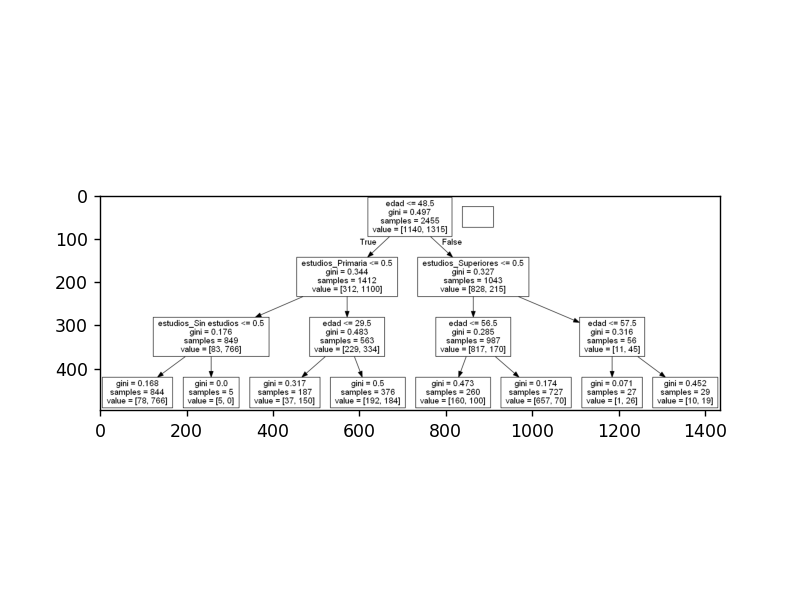

In [9]:
plt.close()
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [10]:

y_pred = dtree.predict(X)
print(y_pred)

[0 0 1 ... 0 1 0]


In [11]:
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.8044806517311609


In [12]:
print("Precision:", metrics.precision_score(y, y_pred))

Precision: 0.8840846366145354


In [13]:
print("Recall:", metrics.recall_score(y, y_pred))

Recall: 0.7307984790874524


In [14]:
'''Mediante la libreria de sklearn, 
creamos la matriz de confusion con 
los datos de 'y_test' y 'y_pred'''
cm = confusion_matrix(y, y_pred)

In [20]:
'''Insertar los nombres de y para la matriz de confusion'''
cm_df = pandas.DataFrame(cm,
                     index = ['Usa Internet', 'No usa Internet'], 
                     columns = ['Usa Internet', 'No usa Internet'])

<IPython.core.display.Javascript object>


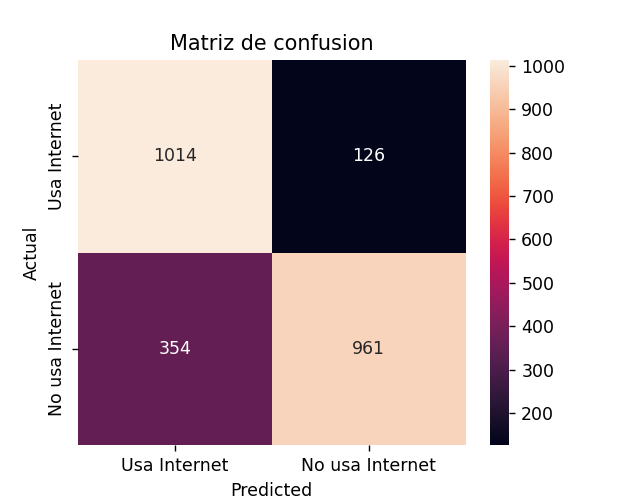

In [21]:
'''Mostrar la matriz creada, 
esto con ayuda de la libreria 
seaborn para realizar un heatmap 
de los datos...'''
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Matriz de confusion')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()